# Signal and noise
- Any measured signal may be tainted by noise.
- Recovering the true signal may be impossible.
- However, we will look at some methods use various strategies for
    - suppressing noise,
    - estimating derivatives,
    - decomposing into different frequencies,
    - decomposing into trend, seasonal changes and residual, and
    - exploratory data analysis.

## Signal-to-Noise Ratio (SNR)
- Signal-to-noise is a ratio that can be caulculated in various ways.
    - A measure of how easy it is to extract the underlying information.
- A common definition is decibel (dB) based.
    - 0 decibel means the signal and noise are of equal magnitude.
    - Every 10 decibel increase means 10 times higher power of the signal compared to the noise.
- Example: [HiFi amplifier](https://www.hegel.com/en/products/integrated/h190):
    - \>100 dB SNR, i.e., $10^{10}$ times higher power of the signal than the noise.
- $SNR = 10 \cdot log_{10} \frac{\sum s_i^2}{\sum n_i^2}$, where $s$ is the signal and $n$ is the noise.
- If the true signal and noise are lost, estimates of these can be made.

In [1]:
import numpy as np
def SNR(signal, noise):
    return 10*np.log10(np.sum(signal**2)/np.sum(noise**2))

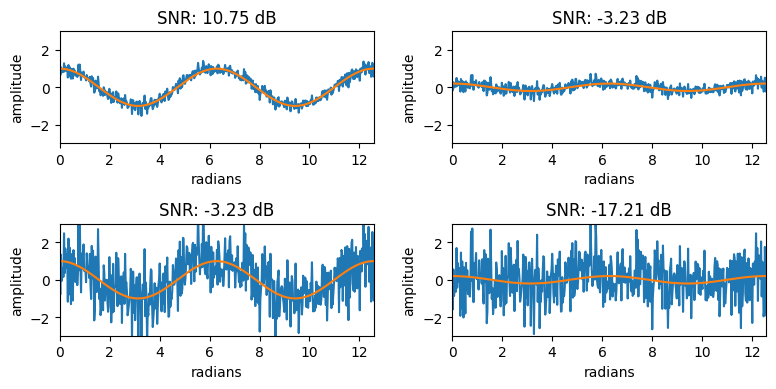

In [2]:
# Plot a cosine curve from 0 to 3pi
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 4*np.pi, 500)
y_cos = np.cos(x)
noise = 0.2*np.random.normal(size=(len(x)))

# Plot the cosine curve with noise
sig = [1, 0.2]
noi = [1, 5]
plt.figure(figsize=(8, 4))
for i in range(4):
    plt.subplot(221+i)
    plt.plot(x, y_cos*sig[np.mod(i,2)] + noise*noi[i//2], label='Noisy cosine curve')
    plt.plot(x, y_cos*sig[np.mod(i,2)], label='Cosine curve')
    plt.xlabel('radians')
    plt.ylabel('amplitude')
    plt.title('SNR: {:.2f} dB'.format(SNR(y_cos*sig[np.mod(i,2)], noise*noi[i//2])))
    plt.xlim((0,4*np.pi))
    plt.ylim((-3,3))
#    plt.legend()
plt.tight_layout()
plt.show()

## Resources
- [Wikipedia: Signal-to-noise ratio](https://en.wikipedia.org/wiki/Signal-to-noise_ratio)